# Remove Camera Distortion

This notebook explores how we can remove the distortion that occurs within the fisheye lens we're using for Marv. 

The particular brand of camera in question is the SainSmart Wide Angle Fish-Eye Camera Lenses for Raspberry Pi Arduino.

We use a fisheye lens so we can take in a broader view of the scene with each image.

There is a range of distortion in any camera you use, some worse than others. Even in cameras that aren't fisheye lenses will have some distortion. Libraries like OpenCV can help us deal with it, which is important because it can potentially throw off our calculations.

# Libraries Used

There are several libraries we need in order to remove camera distortion.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skvideo.io
import cv2
import scipy.ndimage
from matplotlib import animation, rc
import fisheye
%matplotlib inline

C:\Users\corey\Anaconda2\envs\rustler\lib\site-packages\skvideo\__init__.py:356: UserWarning: avconv/avprobe not found in path: 
  warnings.warn("avconv/avprobe not found in path: " + str(path), UserWarning)


# OpenCV Example

OpenCV provides an example image we can use for experiments, and there is some code available to help us use it. Below we copy some of that code and apply it to one of the example images to better understand the library.

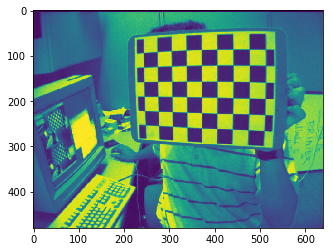

In [5]:
img = scipy.ndimage.imread('D:/Downloads/opencv-3.3.0/samples/data/left01.jpg')
gray = img
plt.imshow(gray)

This is an image of a person holding a chessboard in front of the camera. Apparently the typical way to remove distortion is to calibrate the camera by taking pictures of a chessboard at various orientations and positions. This is one example image of a person creating one such calibration image.

False


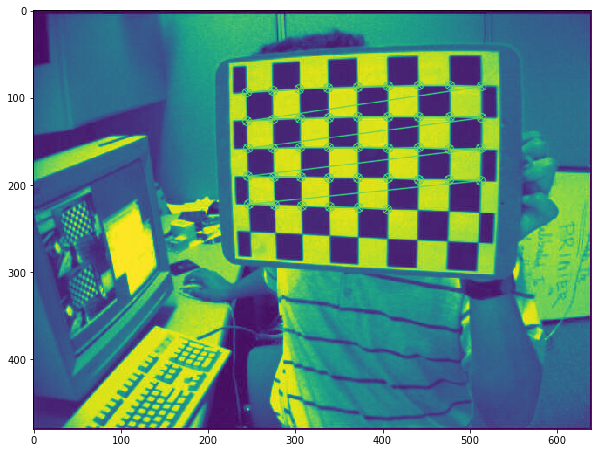

In [12]:
plt.figure(figsize=(10,10))
found, corners = cv2.findChessboardCorners(gray, (6,7))
plt.imshow(cv2.drawChessboardCorners(gray, patternSize=(6,7), corners=corners, patternWasFound=found))
print(found)

For some reason now this isn't wanting to find all the corners. Not sure why, as I believe the same code and image was working successfully on the original notebook I copied this from. Anyway, the idea is that the findChessboardCorners algorithm can locate all of the internal corners of the chessboard image easily, and with call to a related function down to a subpixel level. You can see in the image that all of the corners have been highlighted and the order of them within the chessboard has been drawn. The findChessboardCorners algorithm will use this information to help determine where the chessboard physically is across  different images and that can be used to understand the distortion in the camera.

# Not the unwarp step

At first I was expecting to lay the chessboard down on the ground in front of my car and to have this process allow me to develop the birds-eye view of the chessboard (and thereby track). But that is not what this step does. This step should help make that step more effective though. This step will remove the distortion from the camera alone, so that the image will be nice and flat with respect to physical units. Things that are laying down will still be laying down after this step with the same perspective.

When I tried with thinking it was the unwarp step in mind, the findChessboardCorners routine was never able to find all the corners in the board. While you do want to capture a variety of angles and positions with the chessboard in this process, I'm not sure you ever want the extreme of having it completely laying down, and I don't think it is necessary in order to have a successful camera calibration step.

# References
http://www.learnopencv.com/homography-examples-using-opencv-python-c/